In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define the data
t5_steps = [
    500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000,
    5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000,
    10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500,
    15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000,
    19500, 20000, 20500, 21000
]

t5_training_loss = [
    0.777, 0.3081, 0.2645, 0.248, 0.232, 0.2176, 0.21, 0.2134, 0.2007, 0.1943,
    0.1878, 0.1895, 0.1847, 0.1865, 0.1819, 0.1671, 0.1729, 0.1694, 0.1653, 0.1636,
    0.1672, 0.1656, 0.1669, 0.1633, 0.1604, 0.1521, 0.1578, 0.158, 0.1576, 0.1499,
    0.1493, 0.1517, 0.1524, 0.1517, 0.1525, 0.1487, 0.156, 0.1488, 0.1522, 0.1473,
    0.1476, 0.1552
]

In [3]:
t5_steps = t5_steps[::3]
t5_training_loss = t5_training_loss[::3]

In [4]:
bart_steps = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
bart_training_loss = [2.107900, 0.246400, 0.174000, 0.151100, 0.137800, 0.123300, 0.120700, 0.111700, 0.110200, 0.105600, 0.107300, 0.094800, 0.096300, 0.099300, 0.095800, 0.094500]
bart_validation_loss = [1.254730, 0.186689, 0.128193, 0.117623, 0.110290, 0.103785, 0.101210, 0.098112, 0.096101, 0.094992, 0.093963, 0.092925, 0.091645, 0.090431, 0.090113, 0.090100]


In [5]:
t5_steps_pct = list(map(lambda x: (x*100)/21000, t5_steps))
bart_steps_pct = list(map(lambda x: (x*100)/800, bart_steps))

In [6]:
nmt_losses = [4.7474, 2.8000, 2.2793, 1.9125, 1.6587, 1.4174, 1.3104, 1.0006, 0.9205, 0.8905]
nmt_steps_pct = list(map(lambda x: (x*100)/1000, list(range(100,1001,100))))

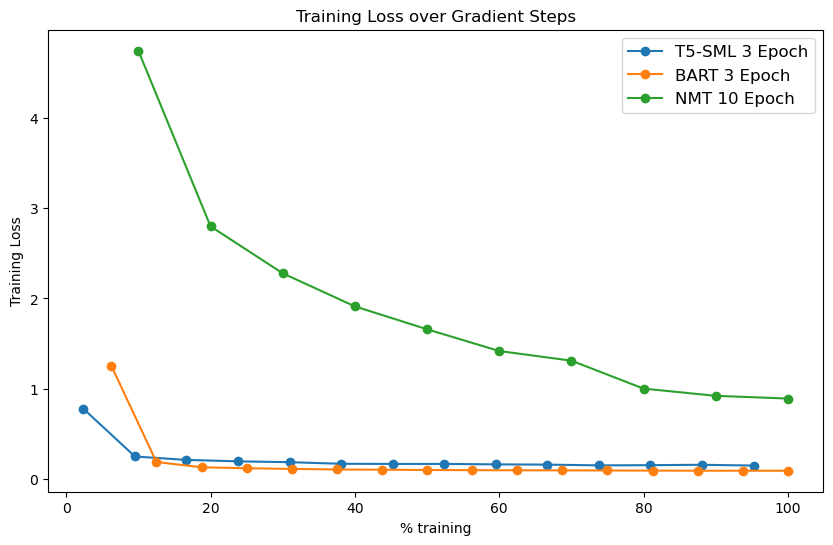

In [7]:
# Create the plot with markers
plt.figure(figsize=(10, 6))
plt.plot(t5_steps_pct, t5_training_loss, marker='o')
plt.plot(bart_steps_pct, bart_validation_loss, marker='o')
plt.plot(nmt_steps_pct, nmt_losses, marker='o')
plt.title('Training Loss over Gradient Steps')
plt.xlabel('% training')
plt.ylabel('Training Loss')
plt.legend(['T5-SML 3 Epoch', 'BART 3 Epoch', 'NMT 10 Epoch'], fontsize='large')
plt.show()

In [8]:
data = {
    'Model': ['T5-Small', 'T5-Small', 'BART', 'BART', 'IBM Graph2Seq\n(2018)', 'GGS-NN\n(2015)'],
    'Metric': ['BLEU', 'METEOR', 'BLEU', 'METEOR', 'BLEU', 'BLEU'],
    'Score': [94.4, 97.4, 95.5, 97.9, 38.9, 35.5]
}


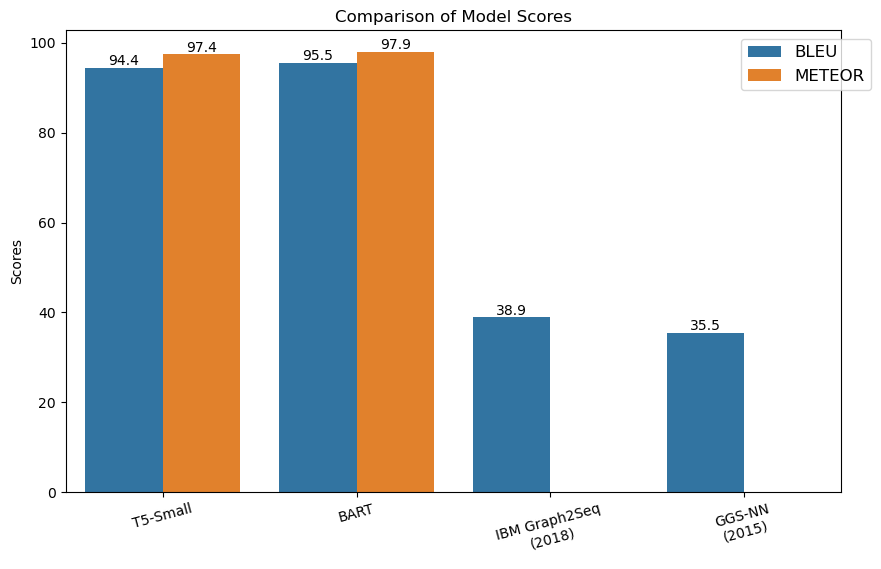

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x='Model', hue='Metric', y='Score')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Comparison of Model Scores')
#plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', fontsize='large')
plt.show()

In [10]:
print("""QUERY - [SOS] What clu was in toronto 1995-96

T5 Model - SELECT clu FROM table WHERE Location = toronto 1995-96
BART model - SELECT Clu FROM table WHERE Year = 1995-96 AND City = Toronto
NMT model - select club from table where club from table where club from table where club from table

Expected = SELECT School/Club Team FROM table WHERE Years in Toronto = 1995-96""")

QUERY - [SOS] What clu was in toronto 1995-96

T5 Model - SELECT clu FROM table WHERE Location = toronto 1995-96
BART model - SELECT Clu FROM table WHERE Year = 1995-96 AND City = Toronto
NMT model - select club from table where club from table where club from table where club from table

Expected = SELECT School/Club Team FROM table WHERE Years in Toronto = 1995-96
